# Classification of amphibians data

## Import necessary libaries

In [62]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Load and Check Data

In [63]:
df=pd.read_csv('dataset.csv',delimiter=';')
df2 = df.copy()
df2.head()

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1


### checking dataset

In [64]:
df.head()

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  189 non-null    int64 
 1   Motorway            189 non-null    object
 2   SR                  189 non-null    int64 
 3   NR                  189 non-null    int64 
 4   TR                  189 non-null    int64 
 5   VR                  189 non-null    int64 
 6   SUR1                189 non-null    int64 
 7   SUR2                189 non-null    int64 
 8   SUR3                189 non-null    int64 
 9   UR                  189 non-null    int64 
 10  FR                  189 non-null    int64 
 11  OR                  189 non-null    int64 
 12  RR                  189 non-null    int64 
 13  BR                  189 non-null    int64 
 14  MR                  189 non-null    int64 
 15  CR                  189 non-null    int64 
 16  Green frogs         189 no

In [66]:
print(df.describe())

               ID             SR          NR          TR          VR  \
count  189.000000     189.000000  189.000000  189.000000  189.000000   
mean    95.000000    9633.227513    1.566138    4.952381    1.904762   
std     54.703748   46256.078309    1.544419    5.590918    1.317407   
min      1.000000      30.000000    1.000000    1.000000    0.000000   
25%     48.000000     300.000000    1.000000    1.000000    1.000000   
50%     95.000000     700.000000    1.000000    1.000000    2.000000   
75%    142.000000    3300.000000    1.000000   12.000000    3.000000   
max    189.000000  500000.000000   12.000000   15.000000    4.000000   

             SUR1        SUR2       SUR3          UR          FR  ...  \
count  189.000000  189.000000  189.00000  189.000000  189.000000  ...   
mean     4.232804    5.391534    5.84127    0.841270    0.846561  ...   
std      3.434615    3.515185    3.29348    1.315291    1.349843  ...   
min      1.000000    1.000000    1.00000    0.000000    0.0

### looking for Nan values

In [67]:
df.isnull().sum()

ID                    0
Motorway              0
SR                    0
NR                    0
TR                    0
VR                    0
SUR1                  0
SUR2                  0
SUR3                  0
UR                    0
FR                    0
OR                    0
RR                    0
BR                    0
MR                    0
CR                    0
Green frogs           0
Brown frogs           0
Common toad           0
Fire-bellied toad     0
Tree frog             0
Common newt           0
Great crested newt    0
dtype: int64

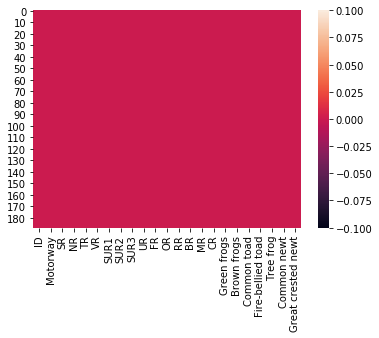

In [68]:
import seaborn as sns
sns.heatmap(df.isnull())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCCA52DA08>,
      dtype=object)

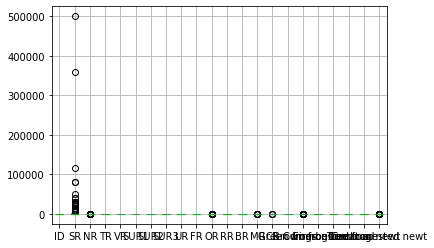

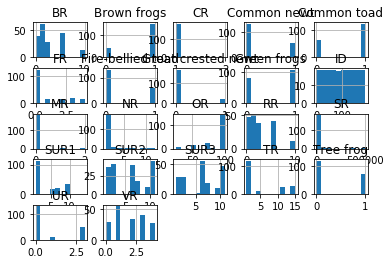

In [69]:
df.boxplot()
df.hist()

###  checking data types

In [70]:
df.dtypes

ID                     int64
Motorway              object
SR                     int64
NR                     int64
TR                     int64
VR                     int64
SUR1                   int64
SUR2                   int64
SUR3                   int64
UR                     int64
FR                     int64
OR                     int64
RR                     int64
BR                     int64
MR                     int64
CR                     int64
Green frogs            int64
Brown frogs            int64
Common toad            int64
Fire-bellied toad      int64
Tree frog              int64
Common newt            int64
Great crested newt     int64
dtype: object

### checking correlation

In [71]:
import seaborn as sns

print (df.corr())


                          ID        SR        NR        TR        VR  \
ID                  1.000000  0.031949 -0.009633  0.131203 -0.050706   
SR                  0.031949  1.000000  0.652757 -0.122781  0.004203   
NR                 -0.009633  0.652757  1.000000 -0.215548 -0.075317   
TR                  0.131203 -0.122781 -0.215548  1.000000  0.112762   
VR                 -0.050706  0.004203 -0.075317  0.112762  1.000000   
SUR1               -0.014693  0.181343  0.139474 -0.042078 -0.030341   
SUR2                0.027579 -0.052974  0.069668 -0.117862 -0.171089   
SUR3                0.069587 -0.071238 -0.049166 -0.072630 -0.195974   
UR                 -0.045317  0.236866  0.319417 -0.373549 -0.542904   
FR                 -0.026509  0.284751  0.388893 -0.394966 -0.537696   
OR                  0.061487  0.009107 -0.034093  0.192270  0.128873   
RR                 -0.114246 -0.056392 -0.115709  0.200839  0.237116   
BR                 -0.207139 -0.057961 -0.110566  0.270011  0.28

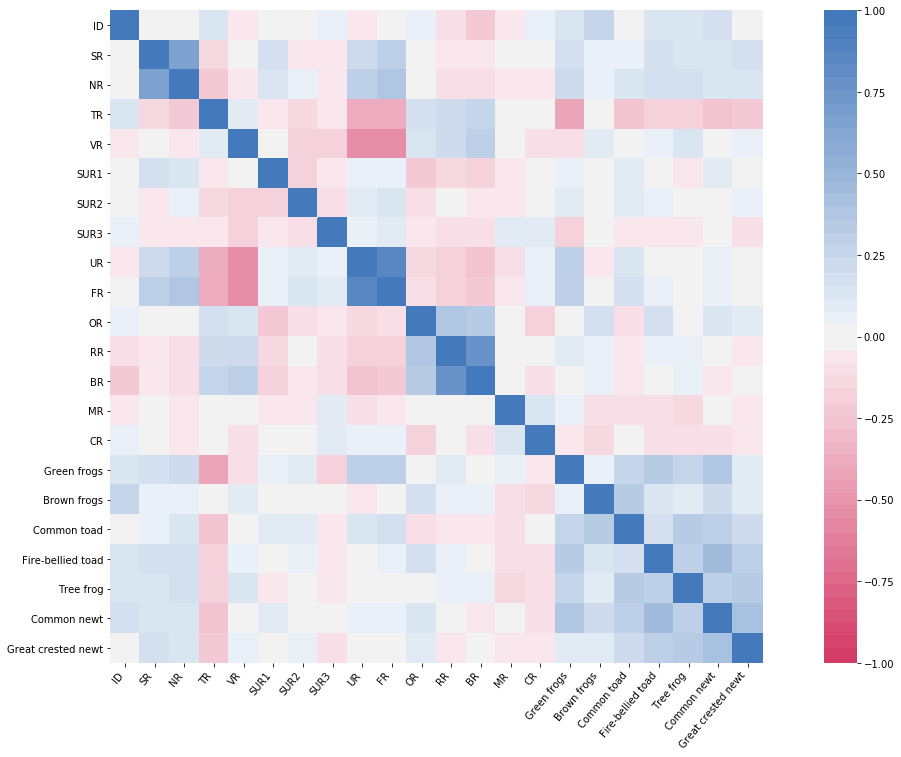

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,12))
correlationMatrix=df.corr(method='pearson')
ax =sns.heatmap(
    correlationMatrix,
    vmin=-1 ,vmax=1, center=0,
    cmap=sns.diverging_palette(0,250,n=50),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
);

In [73]:
df.drop('Motorway',inplace=True, axis=1)

In [74]:
df.head()

,ID,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,600,1,1,4,6,2,10,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,700,1,5,1,10,6,10,3,1,...,1,0,1,0,1,1,0,0,1,0
2,3,200,1,5,1,10,6,10,3,4,...,1,0,1,0,1,1,0,0,1,0
3,4,300,1,5,0,6,10,2,3,4,...,0,0,1,0,0,1,0,0,0,0
4,5,600,2,1,4,10,2,6,0,0,...,5,0,1,0,1,1,1,0,1,1


In [75]:
y=df[['Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt']]

In [76]:
y.head()

,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0
2,0,1,1,0,0,1,0
3,0,0,1,0,0,0,0
4,0,1,1,1,0,1,1


### Drop columns frog's species

In [77]:
x=df.drop(['ID','Green frogs','Brown frogs','Common toad','Fire-bellied toad','Tree frog','Common newt','Great crested newt'],axis=1)

In [78]:
x

,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR
0,600,1,1,4,6,2,10,0,0,50,0,0,0,1
1,700,1,5,1,10,6,10,3,1,75,1,1,0,1
2,200,1,5,1,10,6,10,3,4,75,1,1,0,1
3,300,1,5,0,6,10,2,3,4,25,0,0,0,1
4,600,2,1,4,10,2,6,0,0,99,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2300,1,12,3,2,2,1,0,0,75,2,1,0,1
185,300,1,14,2,7,10,2,0,0,100,5,5,0,1
186,500,1,1,4,1,10,2,0,0,100,5,5,0,1
187,300,1,12,3,2,1,6,0,0,100,1,0,0,1


## feature selection

In [79]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

In [80]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [81]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [82]:
featureScores

,Specs,Score
0,SR,3.849543e+06
1,NR,2.889410e+01
2,TR,2.890903e+02
3,VR,4.003897e+00
4,SUR1,8.695285e+00
5,SUR2,6.754347e+00
6,SUR3,1.106245e+01
7,UR,2.144442e+01
8,FR,2.266251e+01
9,OR,3.900055e+01


In [83]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Specs         Score
0     SR  3.849543e+06
2     TR  2.890903e+02
9     OR  3.900055e+01
1     NR  2.889410e+01
8     FR  2.266251e+01
7     UR  2.144442e+01
6   SUR3  1.106245e+01
12    MR  1.004754e+01
4   SUR1  8.695285e+00
5   SUR2  6.754347e+00


In [84]:
x1=df[['SR','TR','OR','NR','FR','UR','MR','SUR1','SUR2','SUR3']]

In [85]:
x1.head()

,SR,TR,OR,NR,FR,UR,MR,SUR1,SUR2,SUR3
0,600,1,50,1,0,0,0,6,2,10
1,700,5,75,1,1,3,0,10,6,10
2,200,5,75,1,4,3,0,10,6,10
3,300,5,25,1,4,3,0,6,10,2
4,600,1,99,2,0,0,0,10,2,6


### Convert to numpy array

In [86]:
X_numpy = np.array(x)
y_numpy=np.array(y)
print(type(X_numpy))
print(type(y_numpy))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#  Data split (80/20 ratio)


In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.20, random_state = 0)

### Let's examine the data dimension

In [88]:
x_train.shape 

(151, 10)

In [89]:
y_train.shape

(151, 7)

In [90]:
x_test.shape 

(38, 10)

In [91]:
y_test.shape

(38, 7)

# data preprocessing

### scale feature data

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler =StandardScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test =  scaler.transform(x_test)

# Building a simple machine learning model using Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
model = RandomForestClassifier(random_state=1, n_estimators= 5, max_features= 9, max_depth= 11)
model= RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [95]:
y_pred=model.predict(x_test)

In [96]:
y_pred

array([[0, 1, 1, 0, 1, 0, 0],
       [1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 1],
       [0, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 0],
       [1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0],
       [1,

In [97]:
y_test

,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
108,1,1,0,0,0,0,0
74,1,1,1,0,1,0,0
161,1,1,1,1,1,1,0
95,1,1,1,1,1,1,1
123,0,1,0,0,0,0,0
71,1,1,1,0,0,0,0
18,1,1,1,1,0,0,0
124,0,0,0,0,0,0,0
143,1,1,1,1,1,1,0
7,1,1,0,1,0,0,0


In [98]:
y_test1=np.array(y_test)


In [99]:
y_test1

array([[1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0],
       [1, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0],
       [1, 1, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 1],
       [0, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0],
       [1,

# Model accuracy score

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.0

In [118]:
training_accuracy=accuracy_score(y_train,model.predict(x_train))
print("Average Train accuracy ", training_accuracy*100)
testing_accuracy=accuracy_score(y_test,model.predict(x_test))
print("Average Testing accuracy ", testing_accuracy*100)

Average Train accuracy  98.67549668874173
Average Testing accuracy  0.0


# Confusion matrix

In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
cm=confusion_matrix(
    y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

Text(42.0, 0.5, 'true values')

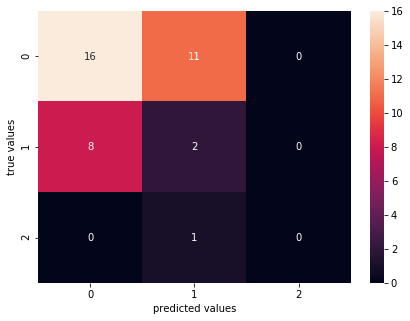

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted values')
plt.ylabel('true values')

# Hyperparameter Tuning

### GridSearchCV

In [105]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,11,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=0,
n_jobs=1)

In [106]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [107]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_*100))

The best parameters are {'max_features': 2, 'n_estimators': 30} with a score of 15.89


### RandomSearchCV

In [108]:
from sklearn.model_selection import RandomizedSearchCV 

randomizedSearchCV = RandomizedSearchCV(
 estimator=model, param_distributions=param_grid,n_iter=5, cv=5, verbose=0,
n_jobs=1,random_state=42)

In [109]:
randomizedSearchCVResults= randomizedSearchCV.fit(x_train, y_train)

In [110]:
print(f"Best score = {randomizedSearchCVResults.best_score_*100}, Best Hyperparameters={randomizedSearchCVResults.best_params_}")

Best score = 12.580645161290322, Best Hyperparameters={'n_estimators': 190, 'max_features': 8}


### Dataframe of Grid search parameters and their Accuracy scores

In [111]:
import pandas as pd
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()

,max_features,n_estimators,Accuracy
0,1,10,0.119355
1,1,20,0.119140
2,1,30,0.106022
3,1,40,0.132258
4,1,50,0.112473


### Preparing data for making contour plots

In [112]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

Accuracy
max_features n_estimators          
1            10            0.119355
             20            0.119140
             30            0.106022
             40            0.132258
             50            0.112473
...                             ...
10           160           0.112473
             170           0.112473
             180           0.105806
             190           0.119140
             200           0.105806

[200 rows x 1 columns]

### Pivoting the data

In [113]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

Accuracy                                                    \
n_estimators       10        20        30        40        50        60    
max_features                                                               
1             0.119355  0.119140  0.106022  0.132258  0.112473  0.139140   
2             0.125591  0.125591  0.158925  0.139140  0.125591  0.125591   
3             0.105591  0.132258  0.112688  0.112473  0.119140  0.112688   
4             0.086022  0.125591  0.118925  0.139140  0.125591  0.132473   
5             0.112473  0.099355  0.132473  0.119355  0.119140  0.112473   
6             0.112473  0.106022  0.099355  0.132473  0.125806  0.125591   
7             0.132688  0.112473  0.119140  0.112473  0.138925  0.119140   
8             0.112688  0.119355  0.132258  0.105806  0.145806  0.105806   
9             0.073118  0.106237  0.118925  0.125806  0.139140  0.132473   
10            0.106237  0.119355  0.132258  0.086237  0.125806  0.086022   

                                                                          \
n_estimators       70        80        90        100       110       120   
max_features                                                               
1             0.119355  0.112473  0.132473  0.112473  0.125806  0.112473   
2             0.152473  0.119140  0.145591  0.132473  0.105806  0.132473   
3             0.112258  0.152043  0.112473  0.132473  0.118925  0.132473   
4             0.118925  0.138925  0.112473  0.132043  0.118925  0.119140   
5             0.138925  0.125806  0.125591  0.138710  0.112473  0.118925   
6             0.112473  0.132473  0.105806  0.112258  0.105806  0.118925   
7             0.138925  0.125806  0.099140  0.118925  0.125591  0.118925   
8             0.132473  0.119140  0.099140  0.112473  0.119140  0.125591   
9             0.119140  0.112473  0.145806  0.118925  0.125591  0.105806   
10            0.119355  0.125806  0.105591  0.112473  0.105806  0.085806   

                                                                          \
n_estimators       130       140       150       160       170       180   
max_features                                                               
1             0.106022  0.119140  0.112473  0.125806  0.112473  0.112473   
2             0.119140  0.132473  0.112473  0.105806  0.119140  0.105806   
3             0.125806  0.125806  0.119140  0.105806  0.119140  0.105806   
4             0.125806  0.112473  0.132043  0.132258  0.125806  0.105806   
5             0.119140  0.132473  0.125376  0.125806  0.105806  0.132258   
6             0.112473  0.105806  0.119140  0.138925  0.112473  0.118925   
7             0.112258  0.132258  0.125806  0.112473  0.125591  0.119140   
8             0.119140  0.105806  0.112473  0.119140  0.125591  0.125591   
9             0.112473  0.119140  0.112473  0.125806  0.112473  0.119140   
10            0.105806  0.105806  0.105806  0.112473  0.112473  0.105806   

                                  
n_estimators       190       200  
max_features                      
1             0.132473  0.119140  
2             0.119140  0.125806  
3             0.105806  0.099140  
4             0.119140  0.125806  
5             0.125591  0.112473  
6             0.105806  0.118925  
7             0.118925  0.119140  
8             0.112473  0.125806  
9             0.119140  0.119140  
10            0.119140  0.105806

In [114]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

### 2D Contour Plot

In [115]:
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=600, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

### 3D Surface Plot

In [116]:

import plotly.graph_objects as go


fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=900, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()